In [1]:
import numpy as np
import pandas as pd 
import joblib
import os
os.chdir('C:/Users/Marc/Desktop/TFG/R Files/Anomaly Detection for SPC')
from Src.FeatureExt.ML_AD_Preprocessing import *
from Src.SPC_Model_Creation.SPC_AD_library import plot_chart, analyze
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
#Pre-processing
#Import data
TS1_Class = pd.read_csv("Data\TimeSeries1_Classification.csv", index_col = 0)
TS1 = pd.read_csv("Data\TimeSeries1.csv", index_col = 0)

TS1.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,11.299253,10.602546,11.297227,9.116576,9.595488,9.449812,9.162078,10.003483,7.493269,9.923813,...,8.991880,10.134501,10.266805,9.240380,10.278369,9.841540,9.991726,11.706317,9.854454,11.490732
1,11.044577,9.697522,10.310637,11.120036,8.677255,10.371553,9.990264,11.462316,10.502977,8.157643,...,10.565371,10.284814,9.937801,10.151304,10.052482,10.355533,10.381790,9.937730,8.289352,10.469869
2,10.169937,13.089710,8.630784,10.898428,8.808158,9.864589,10.132898,9.619725,8.634618,9.831609,...,9.713118,10.092751,9.773269,10.151851,10.070351,10.578743,10.410974,8.077992,9.996154,11.947455
3,10.971050,9.427620,11.322569,9.857622,9.456466,10.758065,11.886617,8.830358,12.091264,9.802317,...,10.580557,10.320932,10.966152,9.457338,11.645824,10.340737,10.940395,8.189891,9.722969,10.457166
4,12.440675,9.805908,10.393729,10.209365,9.414512,11.279358,10.918520,9.779706,9.518128,10.626468,...,10.523174,9.695612,8.993126,10.992359,10.878120,9.346835,10.493236,10.307676,10.076488,10.881435


In [3]:
TS1_Class.head()
TS1_Class.iloc[40:80,19:60]

,19,20,21,22,23,24,25,26,27,28,...,50,51,52,53,54,55,56,57,58,59
40,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
41,0,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
42,0,0,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
43,0,0,0,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
44,0,0,0,0,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
45,0,0,0,0,0,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
46,0,0,0,0,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
47,0,0,0,0,0,0,0,0,1,1,...,1,1,1,1,1,1,1,1,1,1
48,0,0,0,0,0,0,0,0,0,1,...,1,1,1,1,1,1,1,1,1,1
49,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


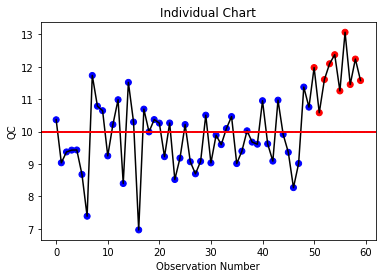

In [4]:
plot_chart(TS1.iloc[270,:],TS1_Class.iloc[270,:],10,10,10)

In [5]:
#Standardize data based on first 20 points of chart, which is supposed in control       
X_train = pd.DataFrame(stdvector(TS1))
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,1.353832,0.616046,1.351687,-0.957539,-0.450390,-0.604655,-0.909353,-0.018338,-2.676558,-0.102705,...,-1.089586,0.120405,0.260509,-0.826435,0.272756,-0.189830,-0.030788,1.784897,-0.176154,1.556601
1,1.179388,-0.429411,0.302837,1.269509,-1.647923,0.375590,-0.079787,1.678297,0.532550,-2.268500,...,0.607068,0.271997,-0.142443,0.112544,-0.005479,0.356456,0.387815,-0.142528,-2.111199,0.493010
2,0.118537,2.134817,-0.944340,0.621605,-0.821853,-0.092324,0.092960,-0.261417,-0.941693,-0.115098,...,-0.196924,0.065236,-0.155385,0.106048,0.049768,0.400843,0.284988,-1.326077,-0.001470,1.346021
3,0.750064,-0.984990,1.145226,-0.501600,-0.952562,0.510636,1.779303,-1.656404,2.009359,-0.563772,...,0.311090,0.019232,0.744559,-0.951583,1.508615,0.041495,0.715604,-2.376389,-0.652971,0.172379
4,2.804632,-0.547442,0.200412,-0.034144,-1.045394,1.327150,0.868076,-0.580777,-0.913569,0.496513,...,0.365098,-0.687765,-1.581501,0.962016,0.816676,-1.131495,0.327009,0.090931,-0.203198,0.820893


In [ ]:
plot_chart(X_train.iloc[270,:],TS1_Class.iloc[270,:],0,0,0)

In [ ]:
#Visualize Features
def plot_vio(data, names, color):
    fig = go.Figure()
    for i in range(0, len(names)):
        fig.add_trace(go.Violin(y=data[names[i]],
                                box_visible=True,
                                meanline_visible=True,
                                name=names[i],
                                legendgroup=names[i],
                                fillcolor=color,
                                line_color="black",
                                opacity=0.6))
    fig.update_layout(
        autosize=False,
        width=600,
        height=800)

    return(fig)


In [ ]:
#Preprocessing
X_labels = np.array(TS1_Class.iloc[:, 19:60]).reshape(TS1_Class.iloc[:, 19:60].size).astype(int)
X_train3 = sw_dataset_3(np.array(X_train), 20)
names = ["last_value", "mean20", "sigma20","mean5", "sigma5", "fin_dif", "kurtosis","dir_change", 'wavg', 'slope', 'meancross', 'rdist', 'brange']
X_train3 = pd.DataFrame(np.transpose(X_train3), columns = names)

In [ ]:
fig= make_subplots(rows=6, cols=2, shared_yaxes='rows',
subplot_titles=("OOC", "IC"))
fig2= make_subplots(rows=7, cols=2, shared_yaxes='rows',
subplot_titles=("OOC", "IC"))
colors=['rgba(31, 119, 180,0.5)', 'rgba(255, 127, 14,0.5)']

fooc=plot_vio(X_train3.iloc[X_labels==1,:],names, color = colors[0])
last= go.Box(y=X_train3.iloc[X_labels==1,:][names[7]], name=names[7], fillcolor=colors[0], line_color = "black", opacity=0.6)
last11= go.Box(y=X_train3.iloc[X_labels==1,:][names[10]], name=names[10], fillcolor=colors[0], line_color = "black", opacity=0.6)
fooc.add_trace(last)
fooc.add_trace(last11)

fic=plot_vio(X_train3.iloc[X_labels==0,:],names, color=colors[1])
last2= go.Box(y=X_train3.iloc[X_labels==0,:][names[7]], name=names[7], fillcolor=colors[1],  line_color = "black", opacity=0.6)
last22= go.Box(y=X_train3.iloc[X_labels==0,:][names[10]], name=names[10], fillcolor=colors[1],  line_color = "black", opacity=0.6)
fic.add_trace(last2)
fic.add_trace(last22)

fig.add_traces(fooc.data[0],1, 1)
fig.add_traces(fooc.data[1],2, 1)
fig.add_traces(fooc.data[2],3, 1)
fig.add_traces(fooc.data[3],4, 1)
fig.add_traces(fooc.data[4],5, 1)
fig.add_traces(fooc.data[5],6, 1)
fig2.add_traces(fooc.data[6],1, 1)
fig2.add_traces(fooc.data[13],2, 1)
fig2.add_traces(fooc.data[8],3, 1)
fig2.add_traces(fooc.data[9],4, 1)
fig2.add_traces(fooc.data[14],5, 1)
fig2.add_traces(fooc.data[11],6, 1)
fig2.add_traces(fooc.data[12],7, 1)

fig.add_traces(fic.data[0],1, 2)
fig.add_traces(fic.data[1],2, 2)
fig.add_traces(fic.data[2],3, 2)
fig.add_traces(fic.data[3],4, 2)
fig.add_traces(fic.data[4],5, 2)
fig.add_traces(fic.data[5],6, 2)
fig2.add_traces(fic.data[6],1, 2)
fig2.add_traces(fic.data[13],2, 2)
fig2.add_traces(fic.data[8],3, 2)
fig2.add_traces(fic.data[9],4, 2)
fig2.add_traces(fic.data[14],5, 2)
fig2.add_traces(fic.data[11],6, 2)
fig2.add_traces(fic.data[12],7, 2)

fig.update_layout(height=1500, width=1000, showlegend=False)
fig2.update_layout(height=1500, width=1000, showlegend=False)

fig.show()
fig2.show()

In [ ]:
scaler = StandardScaler()
scaler = scaler.fit(X_train3)
X_train3 = scaler.transform(X_train3)
X_train3 = pd.DataFrame(X_train3, columns=names)

In [ ]:
fig= make_subplots(rows=3, cols=2, shared_yaxes='all',
subplot_titles=("OOC", "IC"))

fooc=plot_vio(X_train3.iloc[X_labels==1,:],names)
last= go.Box(y=X_train3.iloc[X_labels==1,:][names[7]], name=names[7])
last11= go.Box(y=X_train3.iloc[X_labels==1,:][names[10]], name=names[10])
fooc.add_trace(last)
fooc.add_trace(last11)

fic=plot_vio(X_train3.iloc[X_labels==0,:],names)
last2= go.Box(y=X_train3.iloc[X_labels==0,:][names[7]], name=names[7])
last22= go.Box(y=X_train3.iloc[X_labels==0,:][names[10]], name=names[10])
fic.add_trace(last2)
fic.add_trace(last22)

fig.add_traces(fooc.data[0:4],1, 1)
fig.add_traces(fooc.data[4:7],2, 1)
fig.add_traces(fooc.data[13],2, 1)
fig.add_traces(fooc.data[8:10],3, 1)
fig.add_traces(fooc.data[14],3, 1)
fig.add_traces(fooc.data[11:13],3, 1)

fig.add_traces(fic.data[0:4],1, 2)
fig.add_traces(fic.data[3:7],2, 2)
fig.add_traces(fic.data[13],2, 2)
fig.add_traces(fic.data[8:10],3, 2)
fig.add_traces(fic.data[14],3, 2)
fig.add_traces(fic.data[11:13],3, 2)

fig.update_layout(height=1000, width=1000)

fig.show()

In [ ]:
fig= make_subplots(rows=13, cols=2, shared_yaxes='rows',
subplot_titles=("OOC", "IC"))

fooc=plot_vio(X_train3.iloc[X_labels==1,:],names)
last= go.Box(y=X_train3.iloc[X_labels==1,:][names[7]], name=names[7])
last11= go.Box(y=X_train3.iloc[X_labels==1,:][names[10]], name=names[10])
fooc.add_trace(last)
fooc.add_trace(last11)

fic=plot_vio(X_train3.iloc[X_labels==0,:],names)
last2= go.Box(y=X_train3.iloc[X_labels==0,:][names[7]], name=names[7])
last22= go.Box(y=X_train3.iloc[X_labels==0,:][names[10]], name=names[10])
fic.add_trace(last2)
fic.add_trace(last22)

fig.add_traces(fooc.data[0],1, 1)
fig.add_traces(fooc.data[1],2, 1)
fig.add_traces(fooc.data[2],3, 1)
fig.add_traces(fooc.data[3],4, 1)
fig.add_traces(fooc.data[4],5, 1)
fig.add_traces(fooc.data[5],6, 1)
fig.add_traces(fooc.data[6],7, 1)
fig.add_traces(fooc.data[13],8, 1)
fig.add_traces(fooc.data[8],9, 1)
fig.add_traces(fooc.data[9],10, 1)
fig.add_traces(fooc.data[14],11, 1)
fig.add_traces(fooc.data[11],12, 1)
fig.add_traces(fooc.data[12],13, 1)

fig.add_traces(fic.data[0],1, 2)
fig.add_traces(fic.data[1],2, 2)
fig.add_traces(fic.data[2],3, 2)
fig.add_traces(fic.data[3],4, 2)
fig.add_traces(fic.data[4],5, 2)
fig.add_traces(fic.data[5],6, 2)
fig.add_traces(fic.data[6],7, 2)
fig.add_traces(fic.data[13],8, 2)
fig.add_traces(fic.data[8],9, 2)
fig.add_traces(fic.data[9],10, 2)
fig.add_traces(fic.data[14],11, 2)
fig.add_traces(fic.data[11],12, 2)
fig.add_traces(fic.data[12],13, 2)

fig.update_layout(height=4000, width=500)

fig.show()